In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('C:\\Users\\Asus\\Downloads\\archive (1)\\Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.shape

(10000, 14)

In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
print(df.duplicated().sum())

0


## What is the average age of customers who have exited the bank?


In [15]:
age_churn_stats=df.groupby('Exited')['Age'].describe()
print(age_churn_stats)


         count       mean        std   min   25%   50%   75%   max
Exited                                                            
0       7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1       2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0


The average age of customers who exited the bank is 44. his finding indicates that customers who have left the bank tend to be in their mid-40s, suggesting that this age group may be particularly vulnerable to churn.

In [16]:
gender_churn_stats =df.groupby('Gender')['Exited'].mean()
print(gender_churn_stats)


Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


In [17]:
balance_churn_stats =df.groupby('Exited')['Balance'].describe()
print(balance_churn_stats)

         count          mean           std  min       25%        50%  \
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

              75%        max  
Exited                        
0       126410.28  221532.80  
1       131433.33  250898.09  


In [18]:
credit_score_churn_stats =df.groupby('Exited')['CreditScore'].describe()
print(credit_score_churn_stats)

         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


In [19]:
salary_churn_stats =df.groupby('Exited')['EstimatedSalary'].describe()
print(salary_churn_stats)

         count           mean           std    min       25%        50%  \
Exited                                                                    
0       7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1       2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

               75%        max  
Exited                         
0       148609.955  199992.48  
1       152422.910  199808.10  


### What are the main factors Influencing customer churn?



This analysis identifies key demographic, financial, and behavioral factors that contribute to customer churn, enabling the bank to develop targeted retention strategies.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


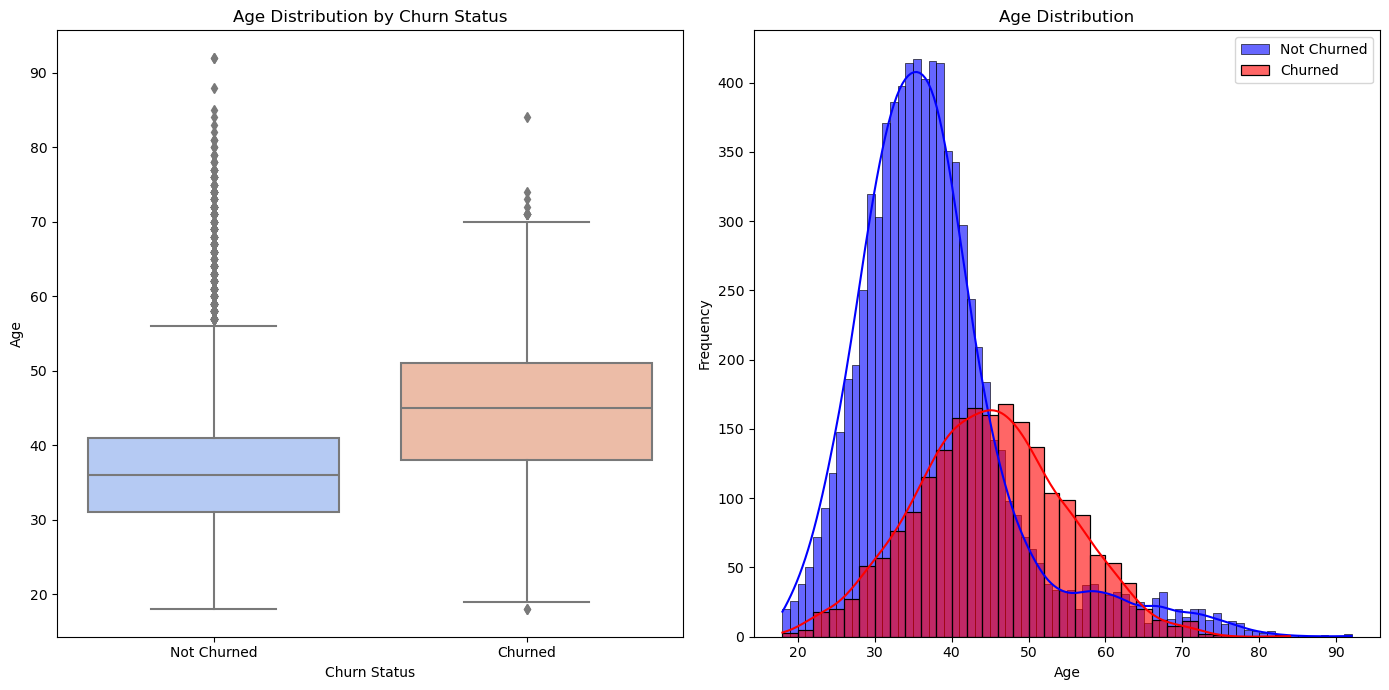

In [21]:

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])


plt.subplot(1, 2, 2)
sns.histplot(df[df['Exited'] == 0]['Age'], kde=True, color='blue', alpha=0.6, label='Not Churned')
sns.histplot(df[df['Exited'] == 1]['Age'], kde=True, color='red', alpha=0.6, label='Churned')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

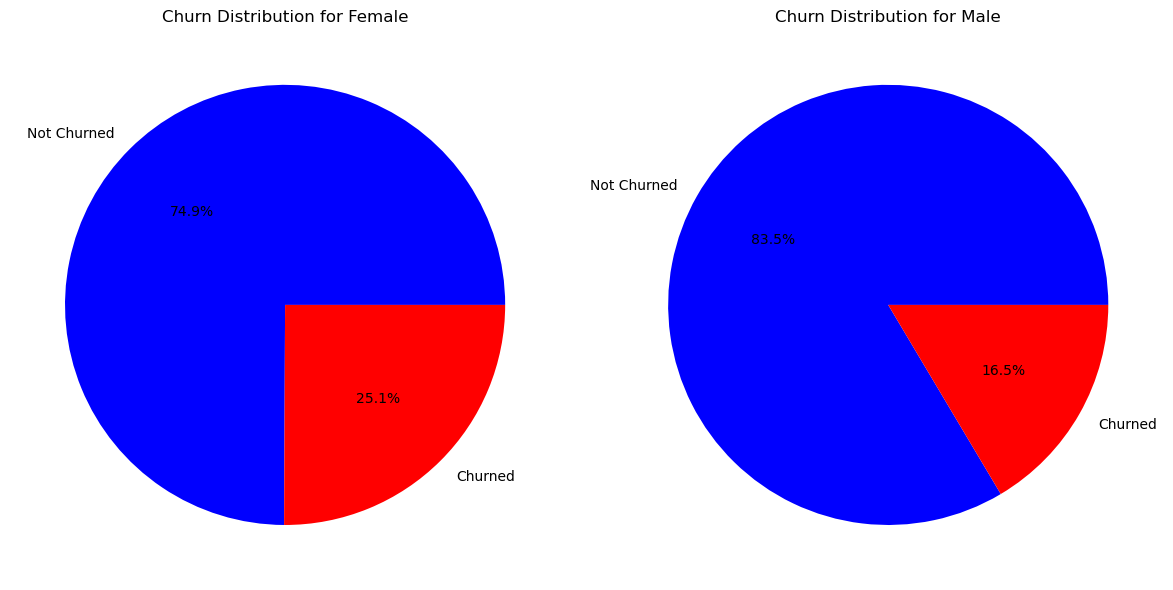

In [23]:
plt.figure(figsize=(12, 8))


for i, gender in enumerate(df['Gender'].unique()):
    plt.subplot(1, 2, i + 1)
    gender_data = df[df['Gender'] == gender]
    pie_data = gender_data['Exited'].value_counts()
    plt.pie(pie_data, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['blue', 'red'])
    plt.title(f'Churn Distribution for {gender}')

plt.tight_layout()
plt.show()


In [24]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


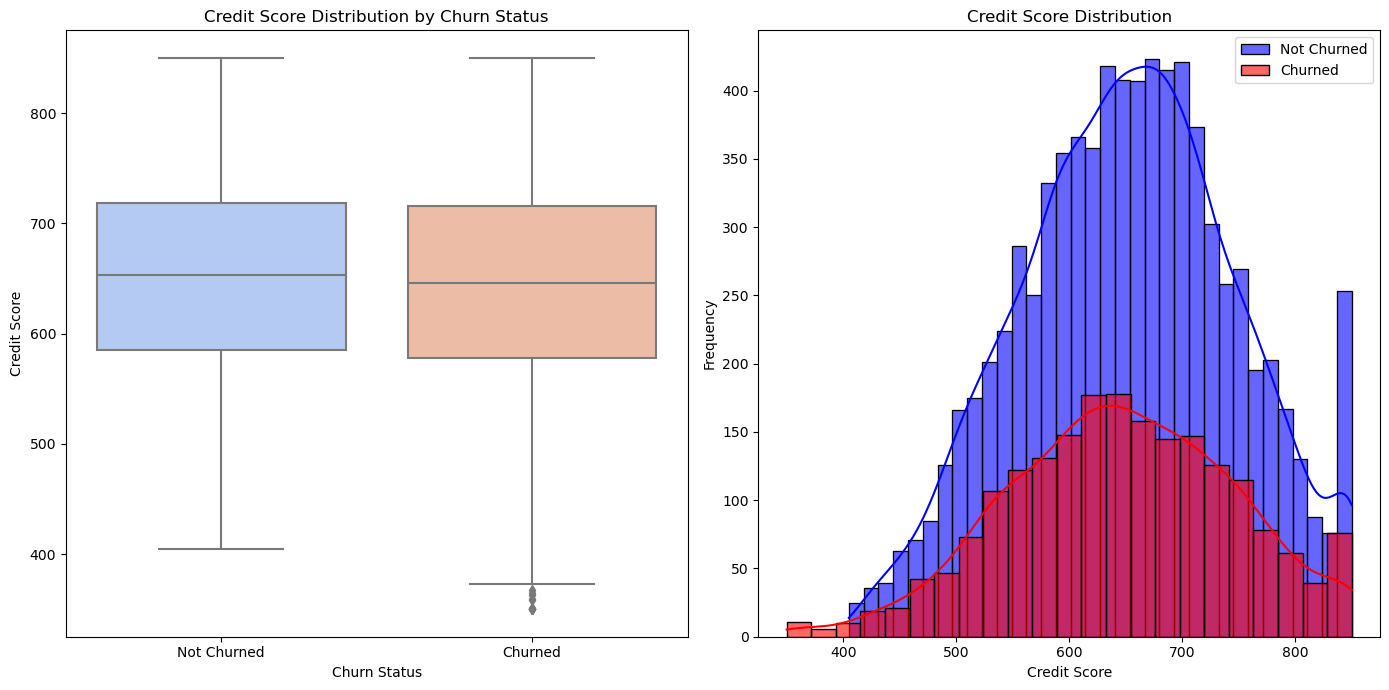

In [25]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=df, palette='coolwarm')
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Not Churned', 'Churned'])


plt.subplot(1, 2, 2)
sns.histplot(df[df['Exited'] == 0]['CreditScore'], kde=True, color='blue', alpha=0.6, label='Not Churned')
sns.histplot(df[df['Exited'] == 1]['CreditScore'], kde=True, color='red', alpha=0.6, label='Churned')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


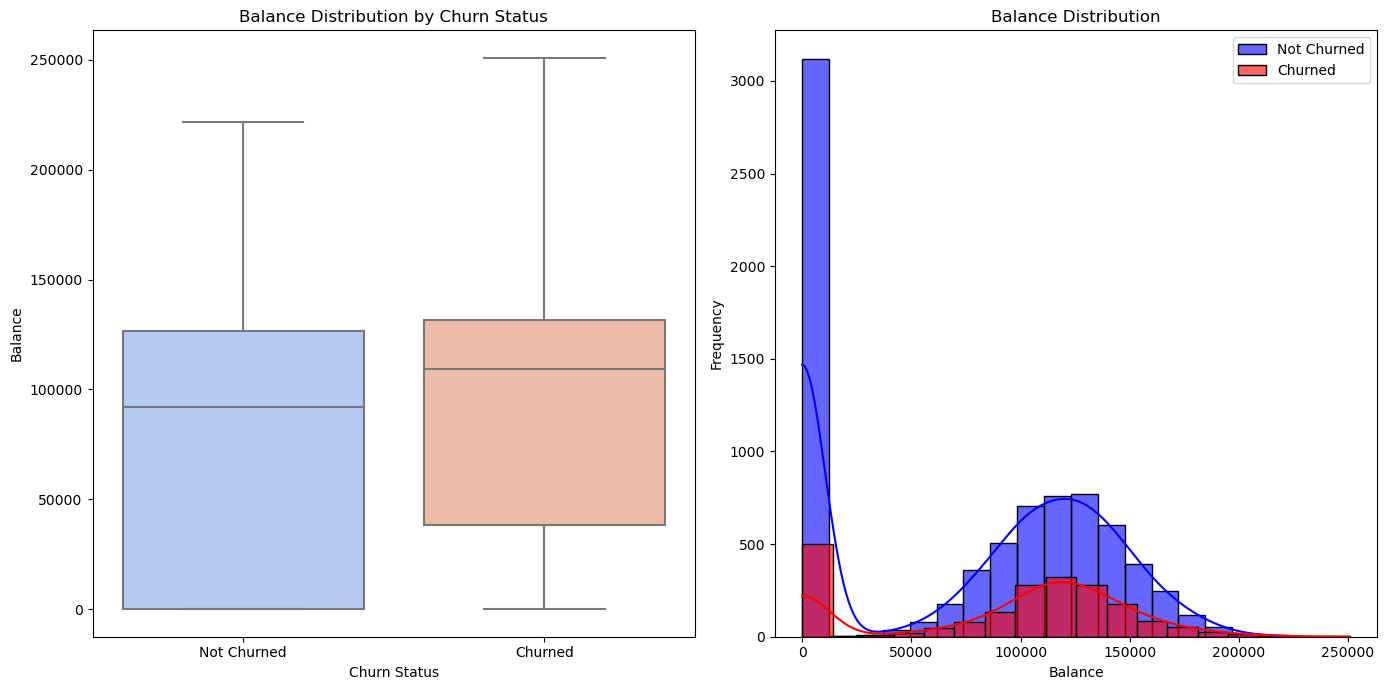

In [26]:
plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=df, palette='coolwarm')
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Balance')
plt.xticks([0, 1], ['Not Churned', 'Churned'])


plt.subplot(1, 2, 2)
sns.histplot(df[df['Exited'] == 0]['Balance'], kde=True, color='blue', alpha=0.6, label='Not Churned')
sns.histplot(df[df['Exited'] == 1]['Balance'], kde=True, color='red', alpha=0.6, label='Churned')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


## How does tenure with the bank influence churn?

In [28]:
print(df['Tenure'].describe())

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


In [29]:
churn_count=df['Exited'].value_counts()
print(churn_count)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [30]:
tenure_churn =df.groupby('Tenure')['Exited'].mean()
print(tenure_churn)

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


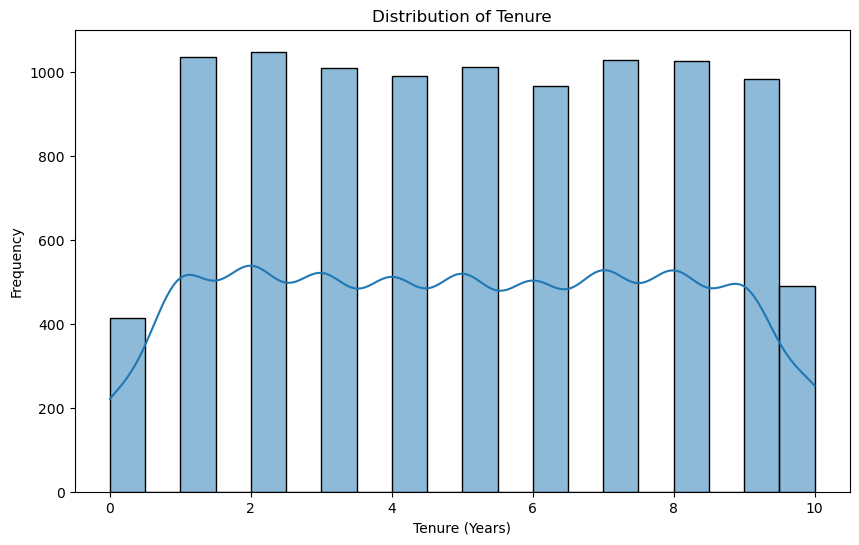

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

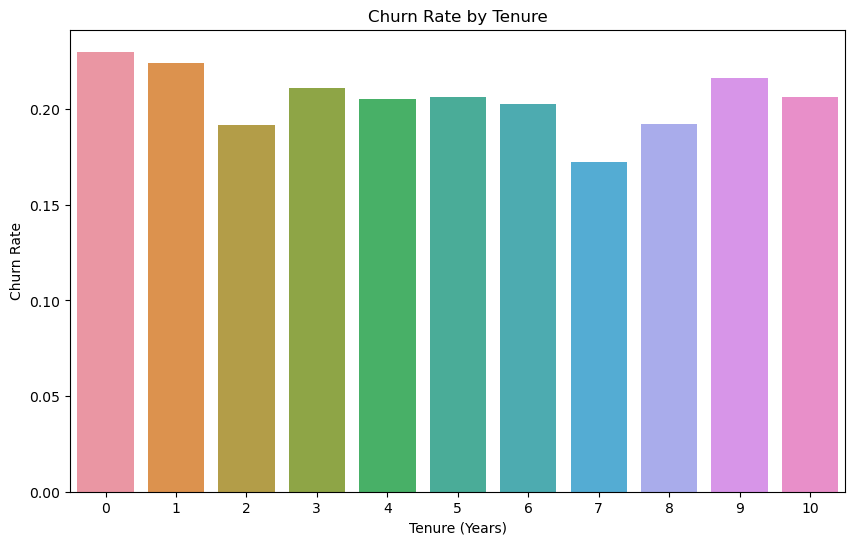

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=tenure_churn.index, y=tenure_churn.values)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.show()

## What are the churn trends across different geographical regions?

In [34]:
geography_churn =df.groupby('Geography')['Exited'].mean().reset_index()
geography_churn 

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


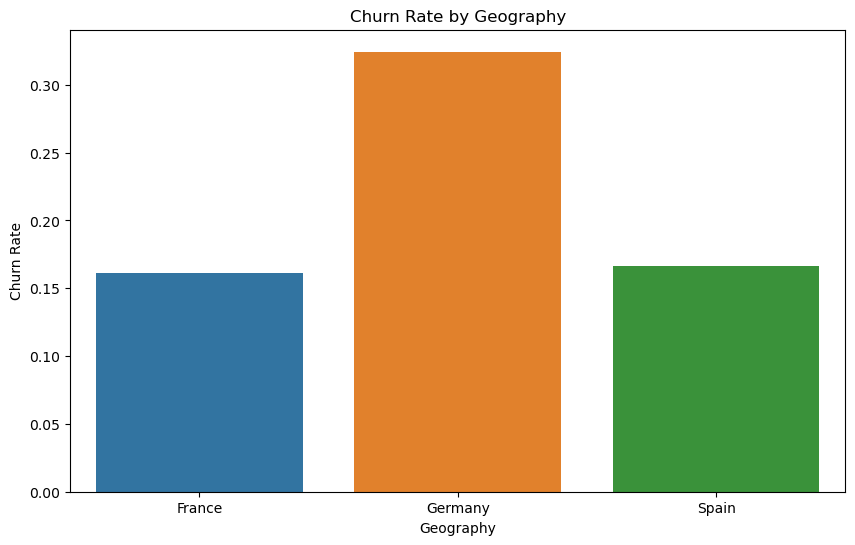

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Exited', data=geography_churn)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

## Is there a relationship between estimated salary and customer loyalty?


In [37]:
print(df['EstimatedSalary'].describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


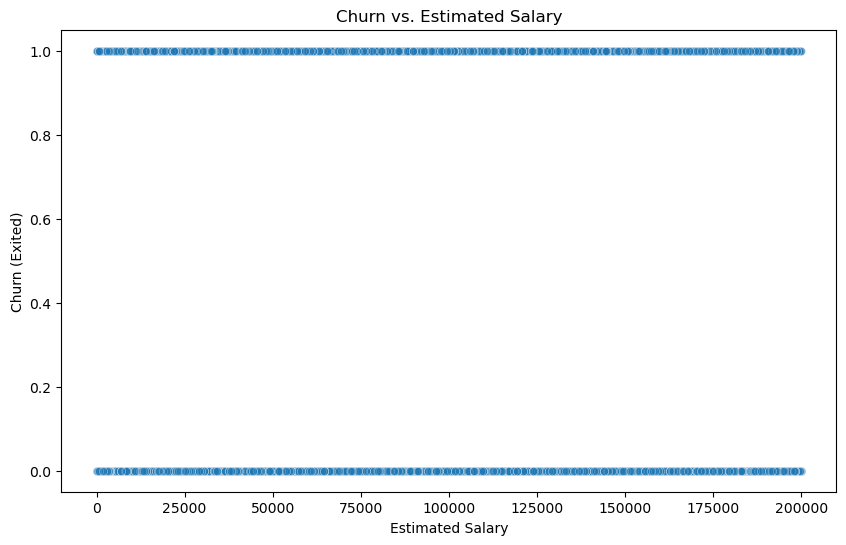

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EstimatedSalary', y='Exited', data=df, alpha=0.5)
plt.title('Churn vs. Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Churn (Exited)')
plt.show()

In [39]:
bins = [0, 30000, 60000, 90000, 120000, df['EstimatedSalary'].max()]
labels = ['0-30K', '30K-60K', '60K-90K', '90K-120K', '120K+']


df['SalaryRange'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels)


salary_churn = df.groupby('SalaryRange')['Exited'].mean().reset_index()
salary_churn.columns = ['Salary Range', 'Churn Rate']

print(salary_churn)

  Salary Range  Churn Rate
0        0-30K    0.204330
1      30K-60K    0.190829
2      60K-90K    0.202342
3     90K-120K    0.202765
4        120K+    0.209139


C:\Users\Asus\AppData\Local\Temp\ipykernel_22316\3484524242.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_churn = df.groupby('SalaryRange')['Exited'].mean().reset_index()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


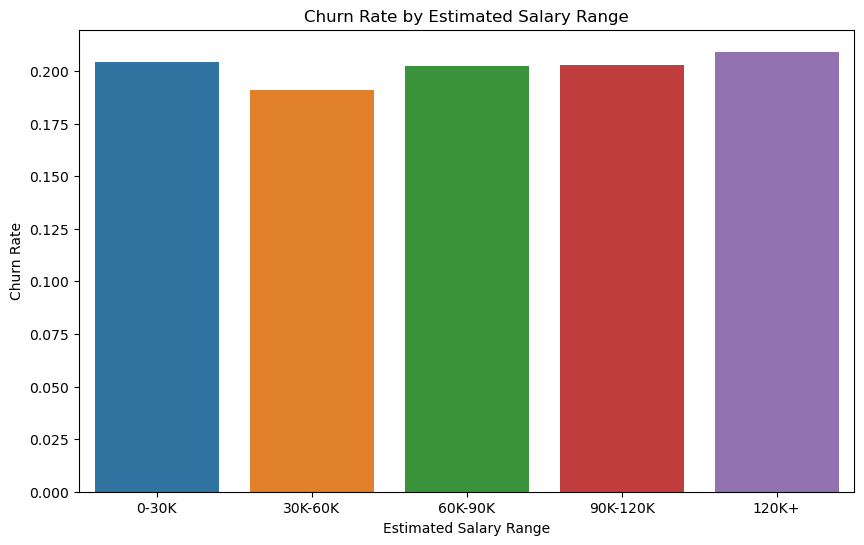

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary Range', y='Churn Rate', data=salary_churn)
plt.title('Churn Rate by Estimated Salary Range')
plt.xlabel('Estimated Salary Range')
plt.ylabel('Churn Rate')
plt.show()


In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SalaryRange'],
      dtype='object')

In [49]:
gender_bal = df[['Gender', 'Balance']].reset_index(drop=True)
gender_bal

,Gender,Balance
0,Female,0.00
1,Female,83807.86
2,Female,159660.80
3,Female,0.00
4,Female,125510.82
...,...,...
9995,Male,0.00
9996,Male,57369.61
9997,Female,0.00
9998,Male,75075.31


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


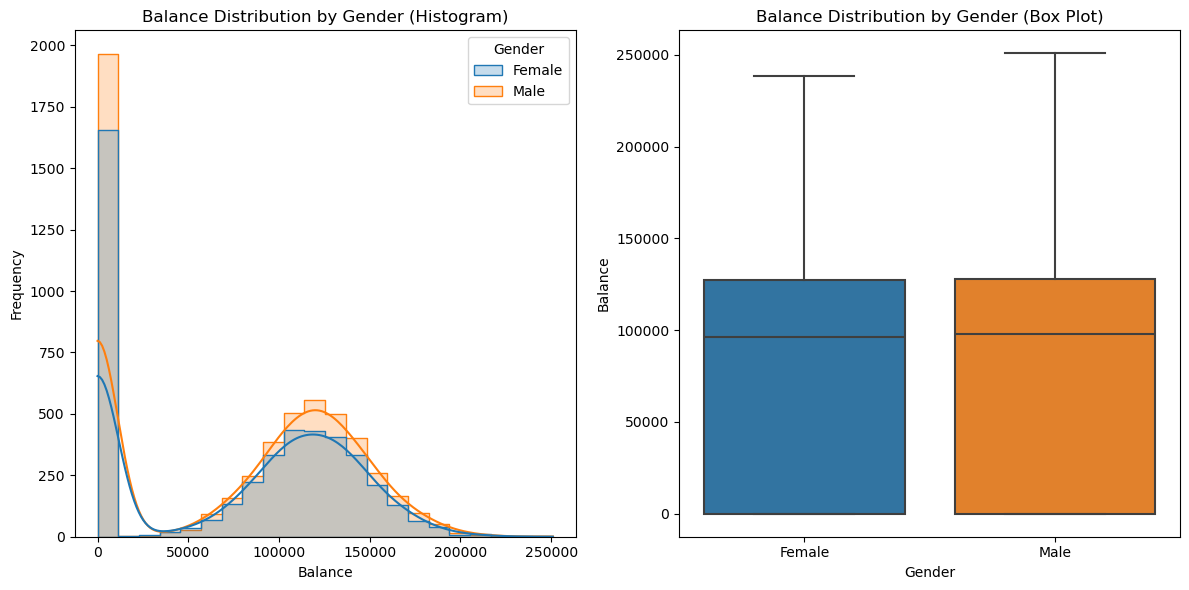

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=gender_bal, x='Balance', hue='Gender', kde=True, element='step')
plt.title('Balance Distribution by Gender (Histogram)')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Balance', data=gender_bal)
plt.title('Balance Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

In [55]:
gender_score = df[['Gender', 'CreditScore']].reset_index(drop=True)
gender_score

,Gender,CreditScore
0,Female,619
1,Female,608
2,Female,502
3,Female,699
4,Female,850
...,...,...
9995,Male,771
9996,Male,516
9997,Female,709
9998,Male,772


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


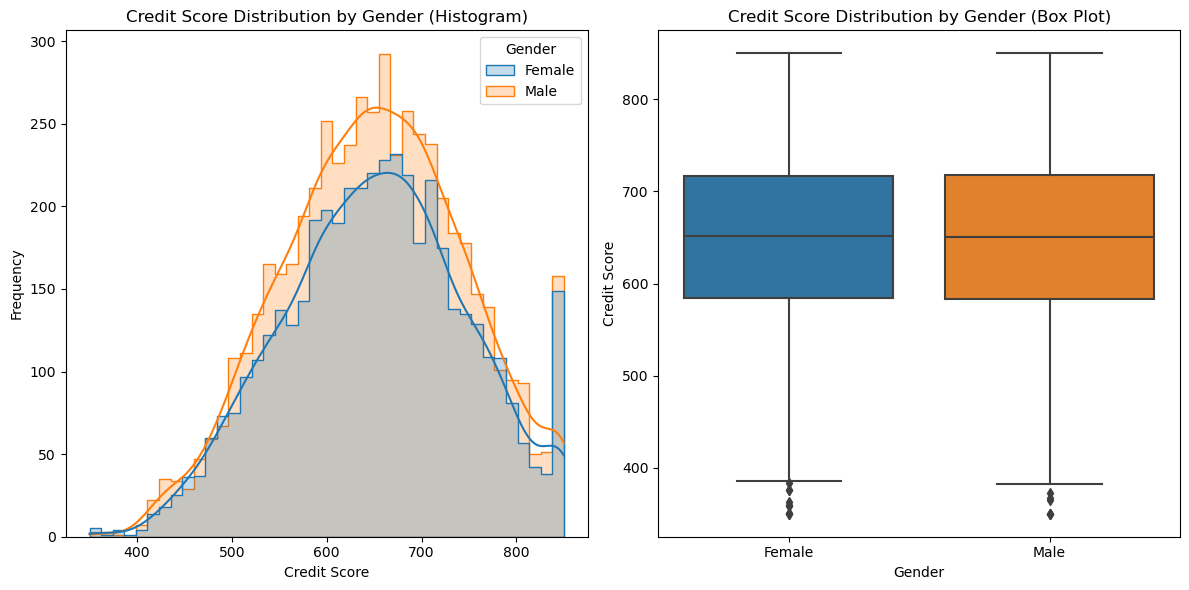

In [57]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=gender_score, x='CreditScore', hue='Gender', kde=True, element='step')
plt.title('Credit Score Distribution by Gender (Histogram)')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='CreditScore', data=gender_score)
plt.title('Credit Score Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Credit Score')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [59]:
gender_tenure = df[['Gender', 'Tenure']].reset_index(drop=True)
gender_tenure

,Gender,Tenure
0,Female,2
1,Female,1
2,Female,8
3,Female,1
4,Female,2
...,...,...
9995,Male,5
9996,Male,10
9997,Female,7
9998,Male,3


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


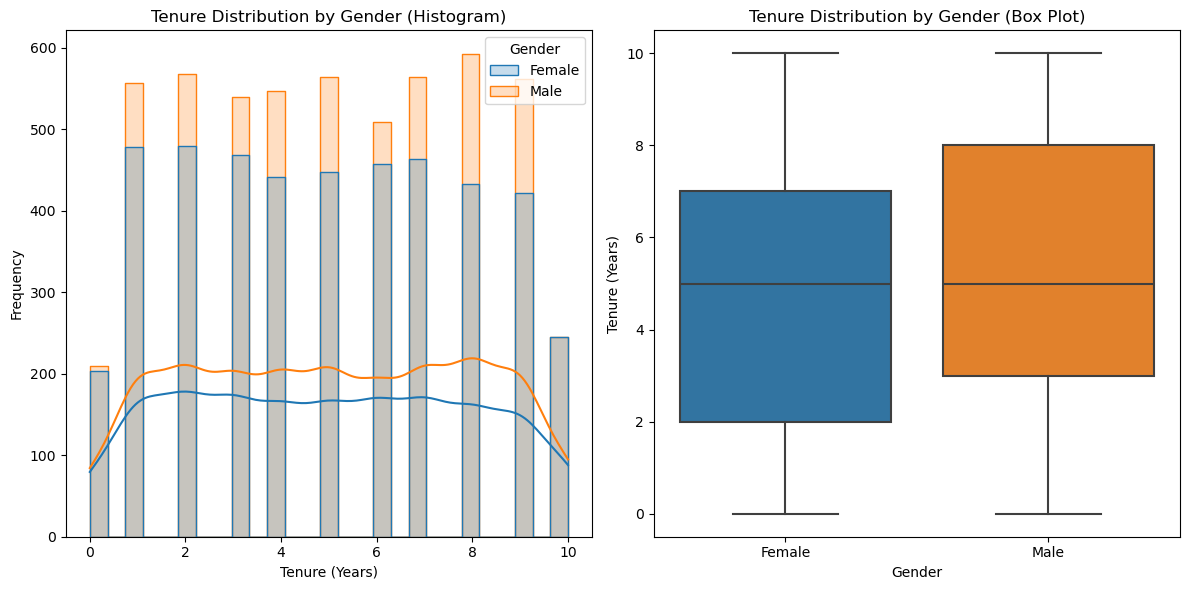

In [63]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=gender_tenure, x='Tenure', hue='Gender', kde=True, element='step')
plt.title('Tenure Distribution by Gender (Histogram)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Tenure', data=gender_tenure)
plt.title('Tenure Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Tenure (Years)')


plt.tight_layout()
plt.show()

In [65]:
gender_salary = df[['Gender', 'EstimatedSalary']].reset_index(drop=True)
gender_salary

,Gender,EstimatedSalary
0,Female,101348.88
1,Female,112542.58
2,Female,113931.57
3,Female,93826.63
4,Female,79084.10
...,...,...
9995,Male,96270.64
9996,Male,101699.77
9997,Female,42085.58
9998,Male,92888.52


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


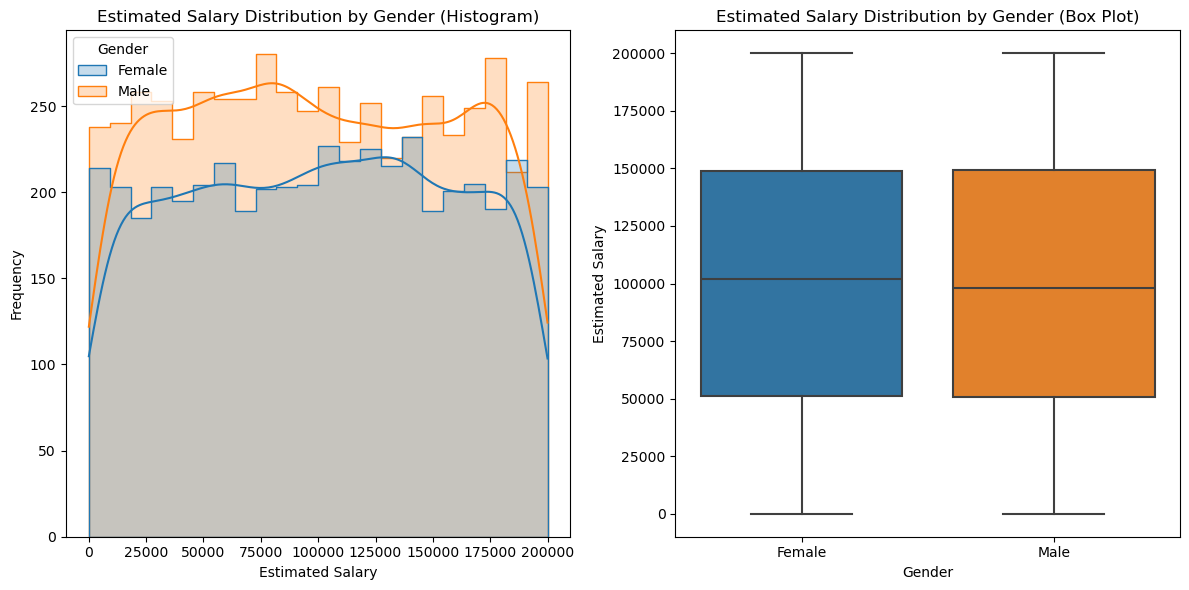

In [67]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=gender_salary, x='EstimatedSalary', hue='Gender', kde=True, element='step')
plt.title('Estimated Salary Distribution by Gender (Histogram)')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='EstimatedSalary', data=gender_salary)
plt.title('Estimated Salary Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')


plt.tight_layout()
plt.show()

In [69]:
gender_age = df[['Gender', 'Age']].reset_index(drop=True)
gender_age

,Gender,Age
0,Female,42
1,Female,41
2,Female,42
3,Female,39
4,Female,43
...,...,...
9995,Male,39
9996,Male,35
9997,Female,36
9998,Male,42


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


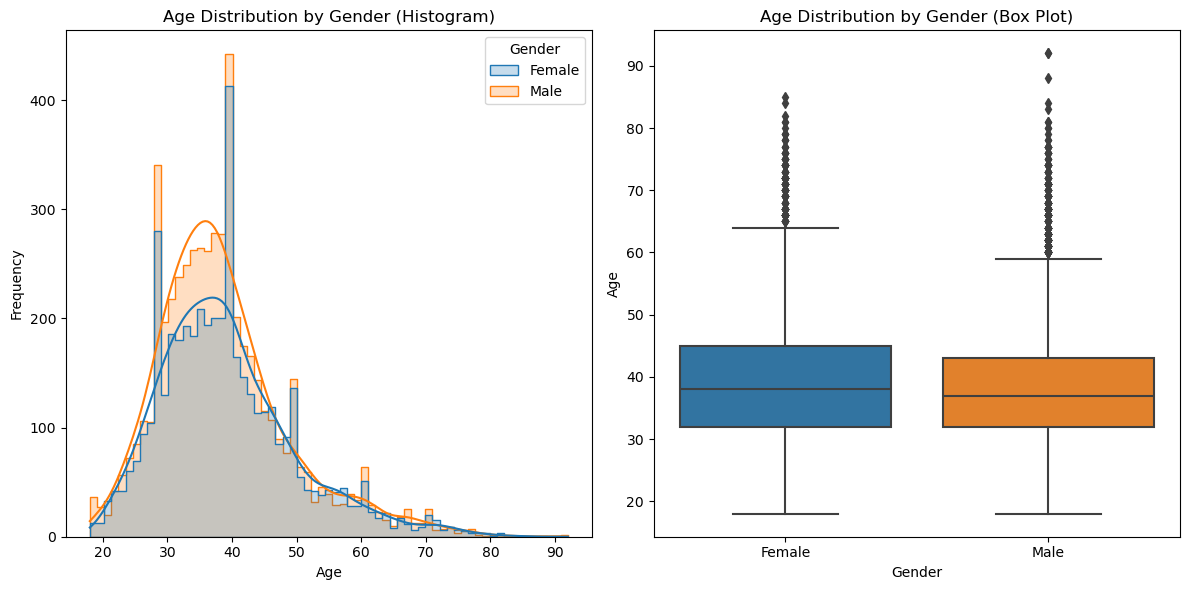

In [71]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data=gender_age, x='Age', hue='Gender', kde=True, element='step')
plt.title('Age Distribution by Gender (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Age', data=gender_age)
plt.title('Age Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Age')


plt.tight_layout()
plt.show()


In [73]:
gender_geography = df[['Gender', 'Geography']].reset_index(drop=True)
gender_geography 

,Gender,Geography
0,Female,France
1,Female,Spain
2,Female,France
3,Female,France
4,Female,Spain
...,...,...
9995,Male,France
9996,Male,France
9997,Female,France
9998,Male,Germany


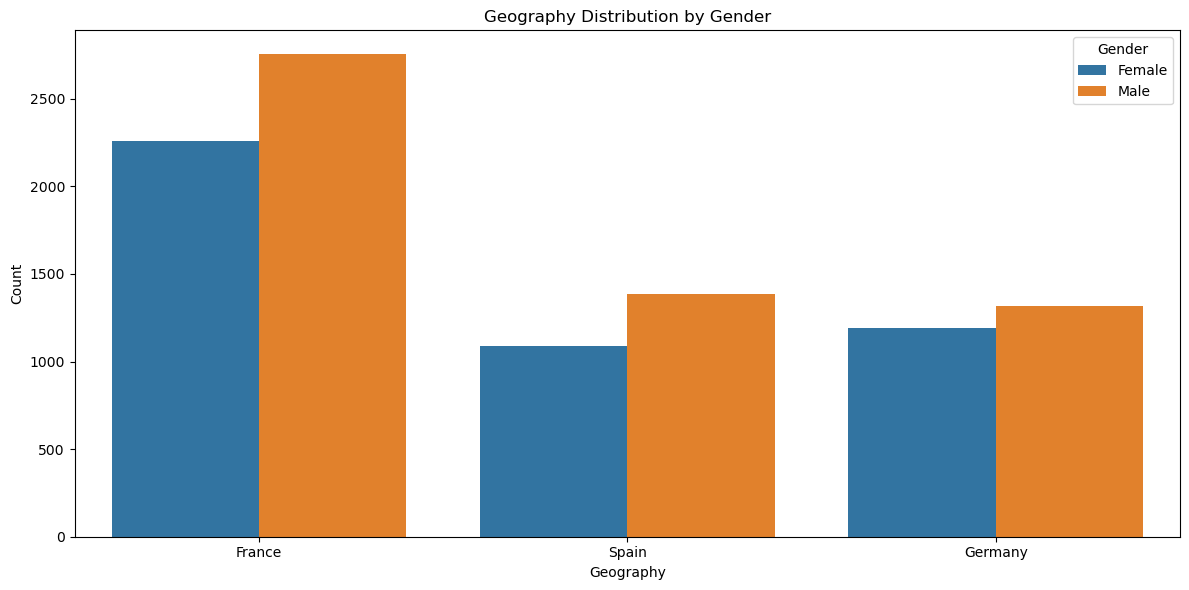

In [77]:
plt.figure(figsize=(12, 6))


sns.countplot(x='Geography', hue='Gender', data=gender_geography)
plt.title('Geography Distribution by Gender')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Gender')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


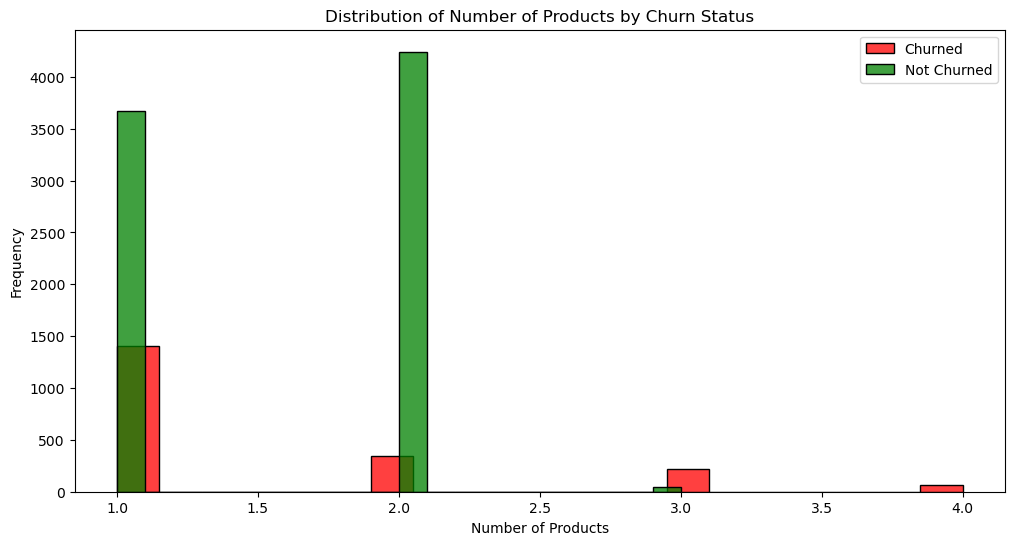

In [81]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Exited'] == 1]['NumOfProducts'], kde=False, color='red', label='Churned')
sns.histplot(df[df['Exited'] == 0]['NumOfProducts'], kde=False, color='green', label='Not Churned')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products by Churn Status')
plt.legend()
plt.show()

In [85]:
churn_rates = df.groupby('IsActiveMember')['Exited'].mean()
print(churn_rates)


IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64


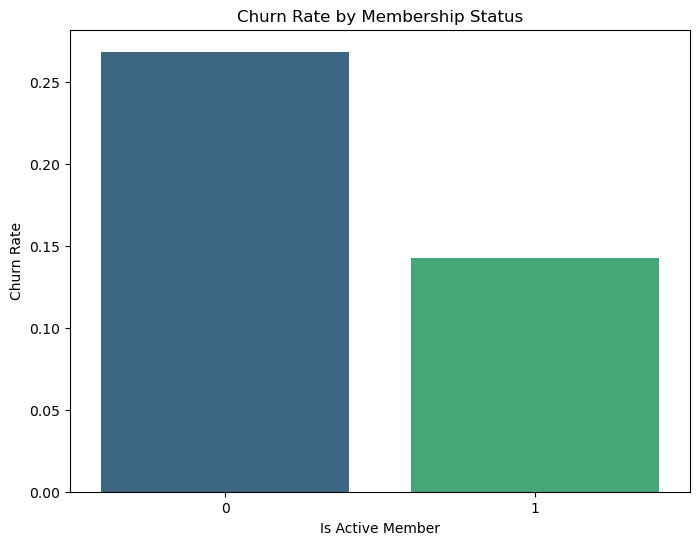

In [87]:

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='viridis')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Membership Status')
plt.show()

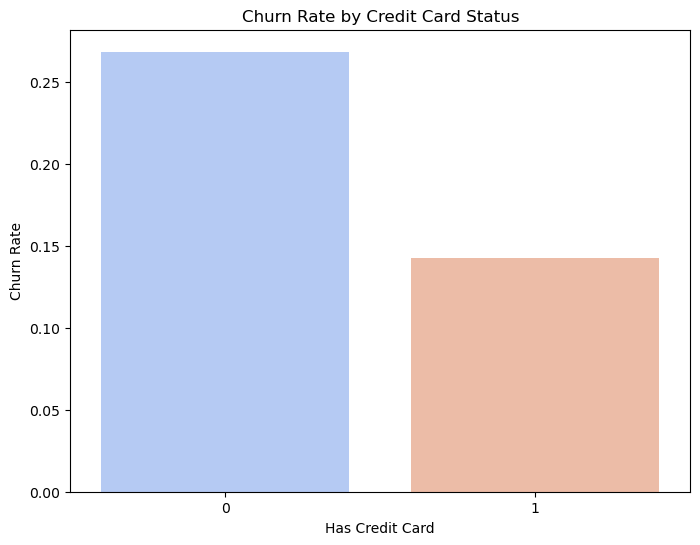

In [89]:
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='coolwarm')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Card Status')
plt.show()

### Insights on Customer Churn

*Mean Age of Exited Customers: The average age of customers who have exited the bank is 44 years.

*Churn Rate by Gender: The churn rate for females is 21.5%, while for males it is 16.5%, indicating that female customers are at a higher risk of leaving.

*Credit Score of Exited Customers: The mean credit score of customers who have left the bank is 645, suggesting that lower credit scores may correlate with increased churn.

*Balance Distribution: A significant number of customers have a zero balance, and those with zero balance accounts exhibit a higher churn rate compared to customers with positive balances.

*Tenure Analysis: While many customers have a tenure of 10 years, those with zero tenure experience a notably higher churn rate, indicating that new customers may be more vulnerable.

*Geographical Churn Rates: Among customers from Spain, Germany, and France, the churn rate is highest in Germany, suggesting regional differences in customer retention.

*Salary and Customer Loyalty: No significant differences in churn rates were found across different salary bins, indicating salary may not be a primary factor influencing customer loyalty.

*Inactive Members and Credit Card Ownership: Inactive members and customers without a credit card exhibit higher churn rates, highlighting the importance of engagement and product usage.

*Further Analysis on Gender Differences: Further investigation revealed that females tend to have lower average bank balances, credit scores, salaries, and tenure with the bank compared to males, which may explain their higher churn rate.

### Conclusion
These insights provide a comprehensive understanding of the factors influencing customer churn, particularly emphasizing the need for targeted retention strategies aimed at specific demographics, especially female customers and those with zero balances or credit card ownership.






